<a href="https://colab.research.google.com/github/mgarciasanes/03MAIR---Algoritmos-de-Optimizacion---2019/blob/master/AG3/Manuel_Garcia_Sanes_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AG- Actividad Guiada 3<br>
Nombre: Manuel Garcia Sanes<br>
https://github.com/mgarciasanes/03MAIR---Algoritmos-de-Optimizacion---2019/tree/master/AG3


In [4]:
import urllib.request
file = "swiss42.tsp"
urllib.request.urlretrieve("http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/swiss42.tsp", file)
!pip install tsplib95

In [0]:
import tsplib95
import random
from math import e,pow

problem = tsplib95.load_problem(file)
#Nodos
Nodos = list(problem.get_nodes())
#Aristas
Aristas = list(problem.get_edges()) 

In [4]:
print("Nodos", Nodos)
print("Aristas", Aristas)


Nodos [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
Aristas [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (

In [7]:
#Devuelve el factorial de un numero
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)
      
      
#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos): 
  solucion = [0]
  for i in range(len(Nodos)-1):
    solucion = solucion + [random.choice(list(set(Nodos) - set({0}) - set(solucion)))]
  return solucion 


#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.wfunc(a,b)


#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)


solucion = crear_solucion(Nodos)

distancia_total(solucion, problem)


5061

In [8]:
def busqueda_aleatoria(problem, N):
  
  Nodos = list(problem.get_nodes())
  
  mejor_solucion = []
  mejor_distancia = 10e100
  
  for i in range(N):
    solucion = crear_solucion(Nodos)
    distancia = distancia_total(solucion, problem)
    
    if distancia < mejor_distancia:
      mejor_solucion = solucion
      mejor_distancia = distancia
      
      
  print("Mejor solución:" , mejor_solucion) 
  print("Distancia     :" , mejor_distancia) 
  return mejor_solucion  

    
    
sol = busqueda_aleatoria(problem, 50000)    

Mejor solución: [0, 28, 23, 21, 18, 27, 41, 26, 6, 29, 38, 36, 35, 31, 19, 2, 39, 30, 22, 8, 24, 40, 25, 10, 11, 4, 37, 15, 20, 14, 12, 5, 13, 7, 17, 34, 33, 32, 3, 9, 16, 1]
Distancia     : 3372


In [10]:
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):
    for j in range(i+1, len(solucion)):
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
      distancia_vecina = distancia_total(vecina, problem)
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


solucion = crear_solucion(Nodos)
print(solucion)

nueva_solucion = genera_vecina(solucion)
print(nueva_solucion)


[0, 34, 7, 2, 28, 10, 22, 8, 25, 1, 29, 30, 39, 4, 24, 23, 12, 32, 6, 19, 20, 18, 37, 15, 17, 13, 21, 5, 16, 36, 33, 14, 9, 40, 38, 41, 3, 31, 11, 26, 35, 27]
[0, 34, 7, 2, 28, 10, 22, 8, 25, 1, 29, 30, 39, 21, 24, 23, 12, 32, 6, 19, 20, 18, 37, 15, 17, 13, 4, 5, 16, 36, 33, 14, 9, 40, 38, 41, 3, 31, 11, 26, 35, 27]


In [11]:
def busqueda_local(problem, N):
  mejor_solucion = []
  mejor_distancia = 10e100
  
  Nodos = list(problem.get_nodes())
  
  solucion_referencia = crear_solucion(Nodos)
  
  for i in range(N):
    vecina = genera_vecina(solucion_referencia)
    distancia_vecina = distancia_total(vecina, problem)
    
    if distancia_vecina < mejor_distancia:
      mejor_solucion = vecina
      mejor_distancia = distancia_vecina
      
    solucion_referencia = vecina
  
  print("Mejor solución:" , mejor_solucion) 
  print("Distancia     :" , mejor_distancia) 
  return mejor_solucion  
  
  


sol = busqueda_local(problem, 500)  
  

Mejor solución: [0, 32, 30, 29, 28, 27, 4, 6, 26, 5, 7, 1, 3, 2, 8, 23, 41, 10, 25, 11, 12, 18, 13, 19, 14, 16, 15, 37, 20, 33, 34, 38, 22, 39, 21, 24, 40, 9, 31, 35, 36, 17]
Distancia     : 1674


In [0]:
def genera_vecina_aleatorio(solucion):
  #Generador de 1 solucion vecina 2-opt (intercambiar 2 nodos)
  #Se puede mejorar haciendo que la elección no se uniforme sino entre las que estén más proximas
  i = random.choice(range(1, len(solucion)) )
  j = random.choice(list(set(range(1, len(solucion))) - {i}))
  
  vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
  
  
  return vecina


def probabilidad(T,d):
  r=random.random();
  if(r <= (e**(-1*d)/(T*1.0))):
    return True
  else:
    return False

def bajar_temperatura(T):
  return T-1




In [13]:
def recocido_simulado(problem, TEMPERATURA):
  #problem = datos del problema
  #T = Temperatura
  
  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)
  
  mejor_solucion = []
  mejor_distancia = 10e100
  
  while TEMPERATURA > 0:
    #Genera una solución vecina(aleatoria)
    vecina = genera_vecina(solucion_referencia)
    
    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)
    
    #Si es la mejor solución de todas se guarda
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina
    
    #Si la nueva vecina es mejor se cambia y si es peor se cambia según una probabilidad dependiente de T y de |distancia_referencia - distancia_vecina|
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    TEMPERATURA = bajar_temperatura(TEMPERATURA)
  
  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol = recocido_simulado(problem, 100)

La mejor solución encontrada es [0, 1, 3, 4, 6, 7, 37, 17, 31, 32, 28, 30, 29, 10, 25, 11, 12, 13, 19, 5, 26, 18, 9, 21, 40, 24, 39, 27, 2, 8, 41, 23, 22, 38, 34, 33, 14, 16, 15, 36, 35, 20]
con una distancia total de 1900


In [0]:
def Add_Nodo(problem, H ,T,alfa=1,beta=1) :
  #Establecer una una funcion de probabilidad para 
  # añadir un nuevo nodo dependiendo de los nodos mas cercanos y de las feromonas depositadas
  Nodos = list(problem.get_nodes())
  return random.choice(   list(set(range(1,len(Nodos))) - set(H) )  )



def Incrementa_Feromona(problem, T, H ) :
  #Incrementar segun la calidad de la solución. Añadir una cantidad inversamente proporcional a la distancia total 
  for i in range(len(H)-1):
    T[H[i]][H[i+1]] += 1000/distancia_total(H, problem)
  return T

def Evaporar_Feromonas(T ):
  #Podemos elegir diferentes funciones de evaporación dependiendo de la cantidad actual y de la suma total de feromonas depositadas,...
  #Evapora 0.3 el valor de la feromona, sin que baje de 1
  T = [[ max(T[i][j] - 0.3 , 1) for i in range(len(Nodos)) ] for j in range(len(Nodos))]
  return T

<b>La funcion Add_Nodo_v2 implementa la funcion de probabilidad para la seleccion del siguiente nodo<b>

In [0]:
def Add_Nodo_v2(problem, H ,T ,alfa=1,beta=1) :
  #Establecer una una funcion de probabilidad para añadir un nuevo nodo dependiendo de los nodos mas cercanos y de las feromonas depositadas
  Nodos = list(problem.get_nodes())
  Nodos_restantes=list(set(Nodos) - set(H) )  
  ravb=[pow(1/distancia(H[-1],i,problem),alfa)*pow(T[H[-1]][i],beta) for i in Nodos_restantes]    
  ravb=[ravb[i]/sum(ravb) for i in range(len(ravb)) ]
  nodo_nuevo=random.choices(Nodos_restantes, weights=ravb)
  return nodo_nuevo[0]

In [73]:
def hormigas(problem, N , agregar_nuevo_nodo=Add_Nodo,alfa=1,beta=1) :
  #problem = datos del problema
  #N = Número de agentes(hormigas)
    
  #Nodos
  Nodos = list(problem.get_nodes())  
  #Aristas
  Aristas = list(problem.get_edges()) 
  
  #Inicializa las aristas con una cantidad inicial de feromonas:1
  T = [[ 1 for _ in range(len(Nodos)) ] for _ in range(len(Nodos))]
  
  #Se generan los agentes(hormigas) que serán estructuras de caminos desde 0
  Hormiga = [[0] for _ in range(N)]
  
  #Recorre cada agente construyendo la solución
  for h in range(N) :
    #print("\nAgente:", h)
    #Para cada agente se construye un camino
    for i in range(len(Nodos)-1) :
      
      #Elige el siguiente nodo
      Nuevo_Nodo = agregar_nuevo_nodo(problem, Hormiga[h] ,T ,alfa=alfa,beta=beta)
      
      Hormiga[h].append(Nuevo_Nodo)     
    
    #Incrementa feromonas en esa arista 
    T = Incrementa_Feromona(problem, T, Hormiga[h] )
    #print("Feromonas(1)", T)
      
    #Evapora Feromonas  
    T = Evaporar_Feromonas(T)
    #print("Feromonas(2)", T)

    #Seleccionamos el mejor agente
  mejor_solucion = []
  mejor_distancia = 10e100
  for h in range(N) :
    distancia_actual = distancia_total(Hormiga[h], problem)
    if distancia_actual < mejor_distancia:
      mejor_solucion = Hormiga[h]
      mejor_distancia =distancia_actual
  
  
  #print(mejor_solucion)
  #print(mejor_distancia)
  return mejor_distancia,mejor_solucion
  

resultados=[]
for alfa in [i/2 for i in range(1,10)]:
  print("_____________________________")
  for beta in [i/2 for i in range(1,10)]:
    for _ in range(4):
      mejor_distancia,mejor_solucion=hormigas(problem, 1000,agregar_nuevo_nodo=Add_Nodo_v2,alfa=alfa,beta=beta)
      resultados.append({'alfa':alfa,'beta':beta,'distancia':mejor_distancia,'N':1000})
      print("Usando alfa=" + str(alfa) + " y beta=" + str(beta) + " distancia es " + str(mejor_distancia))
    

_____________________________
Usando alfa=0.5 y beta=0.5 distancia es 3315
Usando alfa=0.5 y beta=0.5 distancia es 3288
Usando alfa=0.5 y beta=0.5 distancia es 3331
Usando alfa=0.5 y beta=0.5 distancia es 3321
Usando alfa=0.5 y beta=1.0 distancia es 3362
Usando alfa=0.5 y beta=1.0 distancia es 3552
Usando alfa=0.5 y beta=1.0 distancia es 3182
Usando alfa=0.5 y beta=1.0 distancia es 3442
Usando alfa=0.5 y beta=1.5 distancia es 3432
Usando alfa=0.5 y beta=1.5 distancia es 3313
Usando alfa=0.5 y beta=1.5 distancia es 3391
Usando alfa=0.5 y beta=1.5 distancia es 3407
Usando alfa=0.5 y beta=2.0 distancia es 3316
Usando alfa=0.5 y beta=2.0 distancia es 2929
Usando alfa=0.5 y beta=2.0 distancia es 3289
Usando alfa=0.5 y beta=2.0 distancia es 3403
Usando alfa=0.5 y beta=2.5 distancia es 3176
Usando alfa=0.5 y beta=2.5 distancia es 3409
Usando alfa=0.5 y beta=2.5 distancia es 3281
Usando alfa=0.5 y beta=2.5 distancia es 3323
Usando alfa=0.5 y beta=3.0 distancia es 3448
Usando alfa=0.5 y beta=3.

<h2> Comentarios </h2>

<br>

<b>Comentario 1</b>

He modificado la funcion "hormigas" de forma que toma como argumetnos la funcion a utlizar para la seleccion del proximo nodo, asi com tambien los parametros alfa y beta. 

<b>Comentario 2</b>:

Tambien he creado una funcion llamadas Add_Nodo_v2 que selecciona el siguiente nodo utilizando la funcion de probabilidad discutida en clase. 


<b>Comentario 3</b>:

Se ha ejecutado la funcion hormigas un total de 4 veces para cada pareja de valires (alfa,beta). El calculo se a hecho con un valor de N de 1000. Los valores de alfa y beta van desde 0.5 a 4.5 en incrementos de 0.5

Se puede apreciar que lo distancia se optimiza para valores altos de alfa y tambien para valores de beta aunque se aprecia una optimizacion muy leve. 

<b>NOTA:</b>

En la implementacion de la funcion de probabilidad, las variable alfa y beta estan intercambiadas, no obedecen a la notacion discutida en clase. En este caso, alfa es la variable de distancia y beta la variable de feromonas. 

<h2> Analisis  </h2>
  <br>
  
Segun se puede apreciar en las siguientes graficas, el valor de alfa (distancia al proximo nodo) influye de forma importante en la optimizacion del algoritmo. Sin embargo, el valor de beta ( feromonas) no colabora de forma clara. Esto se puede deber a la forma en la que evaporacion de las feromonas esta implementada. <br><br>


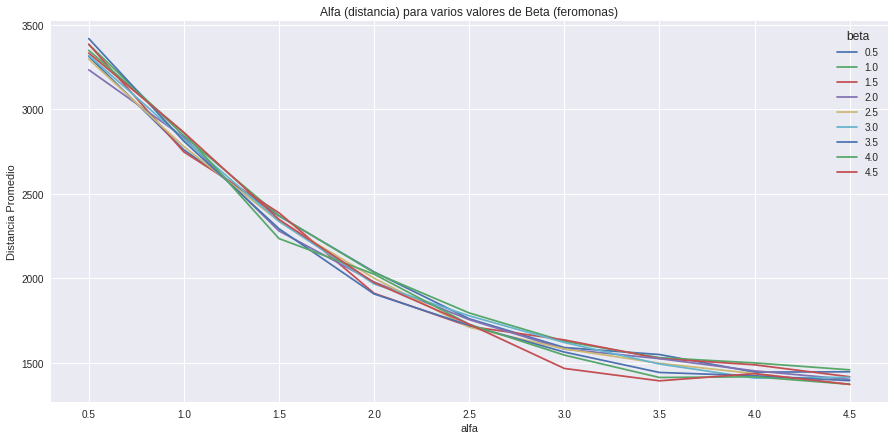

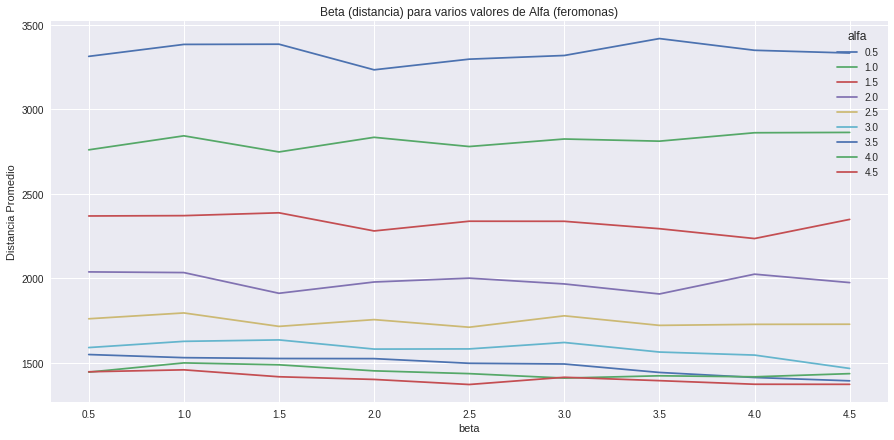

In [93]:
import pandas as pd
import matplotlib.pyplot as plt


df=pd.DataFrame(resultados)

fig1, ax1 = plt.subplots(figsize=(15,7))
plt.ylabel('Distancia Promedio')
plt.title('Alfa (distancia) para varios valores de Beta (feromonas)')

df.groupby(['alfa','beta']).mean()['distancia'].unstack().plot(ax=ax1)


fig2, ax2 = plt.subplots(figsize=(15,7))
plt.ylabel('Distancia Promedio')
plt.title('Beta (distancia) para varios valores de Alfa (feromonas)')
df.groupby(['beta','alfa']).mean()['distancia'].unstack().plot(ax=ax2)